**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [1]:
import functools
import re
import string
import nltk
import functools
import itertools
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from datasketch import MinHash, LeanMinHash
from bs4 import BeautifulSoup


In [ ]:
# colab
from google.colab import drive
drive.mount('/content/drive/')

In [3]:
# download nltk packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jerzy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jerzy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Jerzy\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jerzy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jerzy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jerzy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# non-colab
raw_data = pd.read_csv('data/web_sites_data.csv')
print(raw_data.head())

                                                text
0  <html>\n<head profile="http://www.w3.org/2005/...
1  <html>\n<head profile="http://www.w3.org/2005/...
2  <html>\n<head profile="http://www.w3.org/2005/...
3  <html>\n<head profile="http://www.w3.org/2005/...
4  <html>\n<head profile="http://www.w3.org/2005/...


In [ ]:
# colab
raw_data = pd.read_csv('/content/drive/My Drive/ITMO/1.2/ANLP-2022-materials/Homeworks/web_sites_data.csv')
print(raw_data.head())

#### Data processing

In [5]:
# define lemmatizer
lemmatizer = WordNetLemmatizer()

In [6]:
# removing HTML from raw data
pattern = re.compile('<.*?>') 
table = str.maketrans("","")
punct = string.punctuation + '“”0123456789‘’'

# function to repllace all the HTML with nothing
def remove_html(html):
  cleantext = re.sub(pattern, '', html)
  return cleantext.translate(str.maketrans('','', punct))

# apply the HTML-removing function
raw_data.text = raw_data.text.apply(remove_html)

# replace all the '\n's with nothing
raw_data.text = raw_data.text.apply(lambda x: x.replace('\n', ''))

# additionally remove javascript tags/words
def remove_tags(html):
    soup = BeautifulSoup(html, "html.parser")
    for data in soup(['style', 'script']):
        data.decompose()
    return ' '.join(soup.stripped_strings)

raw_data.text = raw_data.text.apply(remove_tags)

# remove non english words and stop words
words = set(nltk.corpus.words.words()).difference(set(stopwords.words('english')))
def non_english(i):
    return [w for w in nltk.wordpunct_tokenize(i) if w.lower() in words ]
raw_data['text_splitted'] = raw_data.text.apply(non_english)

# lemmatize function
def lemmatize(i):
    return [lemmatizer.lemmatize(w) for w in i]

# remove single characters
def join(i):
    return " ".join(w for w in i if len(w) > 1)


# lemmatize
raw_data.text_splitted = raw_data.text_splitted.apply(lemmatize)
raw_data['text_preprocessed'] = raw_data.text_splitted.apply(join)

data_preprocessed = raw_data[['text_preprocessed', 'text_splitted']]
data_preprocessed.head()

,text_preprocessed,text_splitted
0,Eric Love War Eric Love War Author Eric Title ...,"[Eric, Love, War, Eric, Love, War, Author, Eri..."
1,Eric Short Walk Eric Short Walk Author Eric Ti...,"[Eric, Short, Walk, Eric, Short, Walk, Author,..."
2,Poetry Unabridged Poetry Unabridged Author Tit...,"[Poetry, Unabridged, Poetry, Unabridged, Autho..."
3,Uncle Cabin Uncle Cabin Author Title Uncle Cab...,"[Uncle, Cabin, Uncle, Cabin, Author, Title, Un..."
4,Consider Lily Consider Lily Author Title Consi...,"[Consider, Lily, Consider, Lily, Author, Title..."


In [7]:
# make list, lower
list_of_words = data_preprocessed.text_splitted.explode().to_list()
list_of_words = [x.lower() for x in list_of_words] # lower 

# calculate quantity of each word
frequency = Counter(list_of_words)

# most common words
most_frequent = frequency.most_common(n = 100)
most_frequent

[('game', 263185),
 ('function', 255473),
 ('new', 211120),
 ('news', 205041),
 ('top', 200213),
 ('width', 172568),
 ('stock', 161457),
 ('color', 130093),
 ('data', 128169),
 ('home', 121662),
 ('else', 113903),
 ('height', 109331),
 ('video', 108796),
 ('li', 108361),
 ('return', 104648),
 ('world', 102070),
 ('solid', 90784),
 ('us', 90340),
 ('site', 86666),
 ('padding', 84289),
 ('time', 81460),
 ('market', 81001),
 ('content', 78426),
 ('user', 78060),
 ('city', 73200),
 ('undefined', 72212),
 ('media', 70565),
 ('background', 70157),
 ('get', 68705),
 ('review', 68564),
 ('border', 68132),
 ('n', 67405),
 ('player', 67243),
 ('league', 66815),
 ('privacy', 66528),
 ('date', 66439),
 ('search', 65810),
 ('day', 63341),
 ('use', 63244),
 ('margin', 63107),
 ('false', 62376),
 ('true', 60695),
 ('small', 60423),
 ('football', 60195),
 ('information', 59870),
 ('left', 59606),
 ('page', 59594),
 ('none', 58479),
 ('rating', 56488),
 ('th', 56321),
 ('free', 54553),
 ('may', 54453),

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

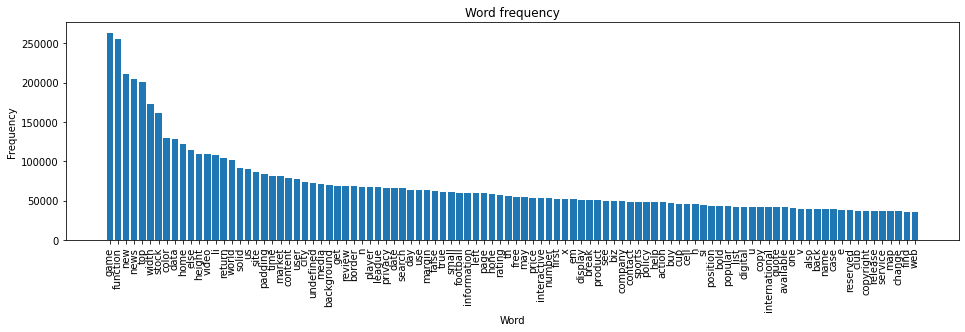

In [8]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.bar([pair[0] for pair in most_frequent], [pair[1] for pair in most_frequent])
ax.set_title('Word frequency')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [9]:
data_preprocessed.head()

# stop words, non-english, html and javascript were deleted

,text_preprocessed,text_splitted
0,Eric Love War Eric Love War Author Eric Title ...,"[Eric, Love, War, Eric, Love, War, Author, Eri..."
1,Eric Short Walk Eric Short Walk Author Eric Ti...,"[Eric, Short, Walk, Eric, Short, Walk, Author,..."
2,Poetry Unabridged Poetry Unabridged Author Tit...,"[Poetry, Unabridged, Poetry, Unabridged, Autho..."
3,Uncle Cabin Uncle Cabin Author Title Uncle Cab...,"[Uncle, Cabin, Uncle, Cabin, Author, Title, Un..."
4,Consider Lily Consider Lily Author Title Consi...,"[Consider, Lily, Consider, Lily, Author, Title..."


# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [25]:
from datasketch.minhash import MinHash
from datasketch.weighted_minhash import WeightedMinHashGenerator
from datasketch.lsh import MinHashLSH
import tqdm

import numpy as np

In [11]:
df = data_preprocessed.text_preprocessed
df.head()

0    Eric Love War Eric Love War Author Eric Title ...
1    Eric Short Walk Eric Short Walk Author Eric Ti...
2    Poetry Unabridged Poetry Unabridged Author Tit...
3    Uncle Cabin Uncle Cabin Author Title Uncle Cab...
4    Consider Lily Consider Lily Author Title Consi...
Name: text_preprocessed, dtype: object

In [32]:
# split text into shingles
def split_text(text, n):  
    text = text.split()
    temp = set()
    for i in range(0, len(text)-n):
        s = ''.join(text[i : i+n])
        temp.add(s)
    return temp

# apply minhash function
def minhash_estimation(object, num_perm, char_ngrams): # taken from https://skeptric.com/minhash/
    m = MinHash(num_perm)
    for i in split_text(object, char_ngrams):
        m.update(i.encode('utf8'))
    return m

# Apply minhash to each shingle set, create LSH object
def lsh_similarity(texts_preprocessed:pd.Series, num_perm, char_ngrams): # taken from https://skeptric.com/minhash-lsh/ and http://ekzhu.com/datasketch/lsh.html
    lsh = MinHashLSH(num_perm=num_perm) # threshold is 0.9 by default  
    MinHashes = []
    for i, text in enumerate(texts_preprocessed):
        MinHash_estimation = minhash_estimation(text, num_perm, char_ngrams)
        MinHashes.append(MinHash_estimation)
        lsh.insert(str(i), MinHash_estimation) # insert id and signature
    print(num_perm, char_ngrams)
    return MinHashes, lsh

# overall function to get number of duplicates
def duplicates_estimation(texts_preprocessed:pd.Series, num_perm, char_ngrams): 
    MinHashes, LSH = lsh_similarity(texts_preprocessed, num_perm, char_ngrams)
    duplicates = 0
    for MinHash in MinHashes:
        l = len(LSH.query(MinHash)) - 1
        if l > 0:
            duplicates += l
    print(num_perm, char_ngrams, duplicates)
    return duplicates

32 4
32 4 5927920
64 4
64 4 5278274
128 4
128 4 4622030
256 4
256 4 4699358


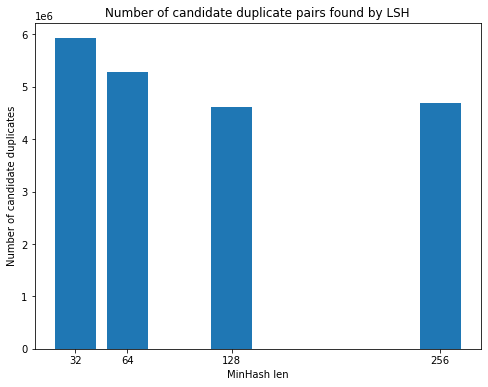

In [36]:
# different minhash len

X = []
minhash_len = [32, 64, 128, 256]
for l in minhash_len:
        x = duplicates_estimation(df, l, 4)
        X.append(x)

# plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(minhash_len, X, align = 'center', width = 25)
plt.title('Number of candidate duplicate pairs found by LSH')
plt.xlabel('MinHash len')
plt.ylabel('Number of candidate duplicates')
plt.xticks(minhash_len, minhash_len)
plt.show()

128 3
128 3 3593738
128 4
128 4 4622030
128 5
128 5 2680430
128 6
128 6 2332482
128 7
128 7 1807966
128 8
128 8 1773442
128 9
128 9 2802410
128 10
128 10 1763382


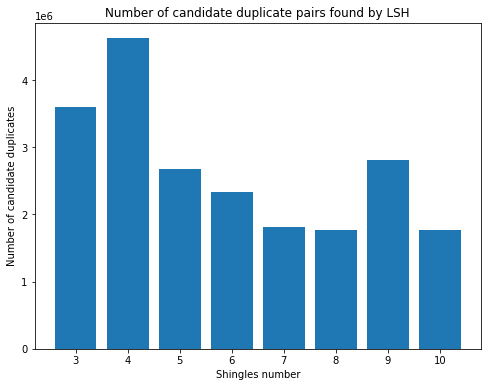

In [35]:
# different shingle size

X = []
shingles = [3, 4, 5, 6, 7, 8, 9, 10]
for shingle in shingles:
        x = duplicates_estimation(df, 128, shingle)
        X.append(x)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(shingles, X, align='center')
plt.title('Number of candidate duplicate pairs found by LSH')
plt.xlabel('Shingles number')
plt.ylabel('Number of candidate duplicates')
plt.xticks(shingles, shingles)
plt.show()